# 1-Stock Price Analysis

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

## Importing data from yahoo

In [2]:
df = pdr.get_data_yahoo('GLD', '2016-11-08')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-11-08,123.089996,121.360001,122.120003,121.639999,9173700,121.639999
2016-11-09,124.349998,121.110001,124.300003,121.559998,18236500,121.559998
2016-11-10,121.540001,119.379997,121.519997,119.750000,22268000,119.750000
2016-11-11,119.690002,116.230003,119.650002,117.099998,20381800,117.099998
2016-11-14,117.139999,115.489998,116.120003,116.110001,20431800,116.110001


## Discard unneeded data

In [3]:
df_close = pd.DataFrame(df.Close)

##  Rolling method to compute moving averages

In [4]:
df_close['MA_9'] = df_close.Close.rolling(9).mean().shift()
df_close['MA_21'] = df_close.Close.rolling(21).mean()

In [5]:
df_close.head()

,Close,MA_9,MA_21
Date,,,
2016-11-08,121.639999,NaN,NaN
2016-11-09,121.559998,NaN,NaN
2016-11-10,119.750000,NaN,NaN
2016-11-11,117.099998,NaN,NaN
2016-11-14,116.110001,NaN,NaN


In [6]:
df.shape

(561, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 561 entries, 2016-11-08 to 2019-02-01
Data columns (total 6 columns):
High         561 non-null float64
Low          561 non-null float64
Open         561 non-null float64
Close        561 non-null float64
Volume       561 non-null int64
Adj Close    561 non-null float64
dtypes: float64(5), int64(1)
memory usage: 30.7 KB


In [8]:
df_close['MA_9'].head(15)

Date
2016-11-08           NaN
2016-11-09           NaN
2016-11-10           NaN
2016-11-11           NaN
2016-11-14           NaN
2016-11-15           NaN
2016-11-16           NaN
2016-11-17           NaN
2016-11-18           NaN
2016-11-21    117.929999
2016-11-22    117.256666
2016-11-23    116.587778
2016-11-25    115.865556
2016-11-28    115.366667
2016-11-29    115.110001
Name: MA_9, dtype: float64

# Ploting

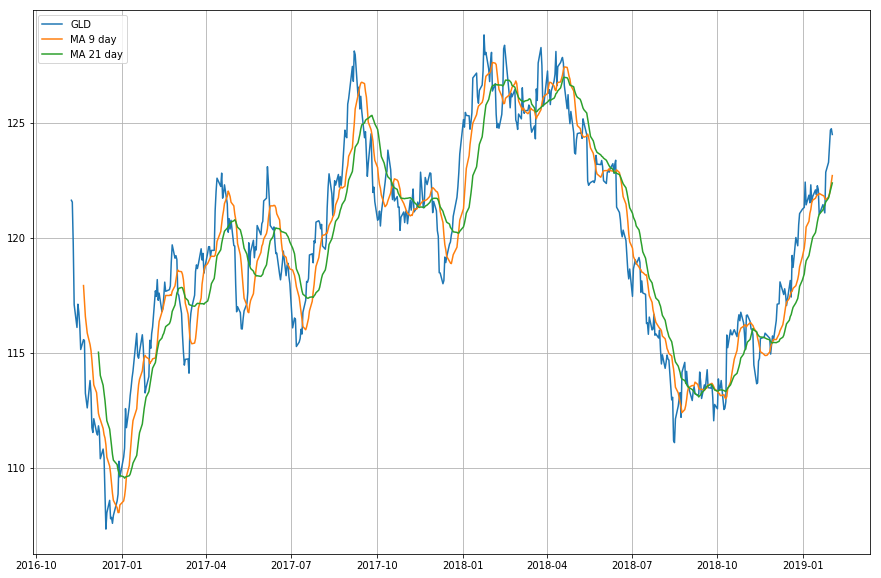

In [9]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df_close['Close'],label='GLD')
plt.plot(df_close['MA_9'], label='MA 9 day')
plt.plot(df_close['MA_21'], label='MA 21 day')
plt.legend(loc=2)

## Compute log change (instantaneous rate of return)

In [10]:
df_close["change"] = np.log(df_close["Close"] / df_close["Close"].shift())

In [11]:
df_close.head()

,Close,MA_9,MA_21,change
Date,,,,
2016-11-08,121.639999,NaN,NaN,NaN
2016-11-09,121.559998,NaN,NaN,-0.000658
2016-11-10,119.750000,NaN,NaN,-0.015002
2016-11-11,117.099998,NaN,NaN,-0.022378
2016-11-14,116.110001,NaN,NaN,-0.008490


## Plot

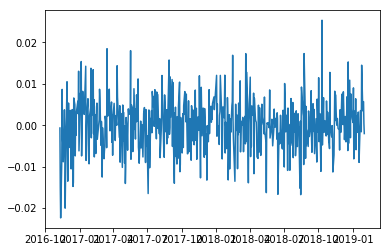

In [12]:
plt.plot(df_close.change)

**Plot reveals noisy data centered around 0**

## Compute rolling historical volatility, offset using .shift() method

In [13]:
df_close['Volatility'] = df_close.change.rolling(21).std().shift()


In [14]:
df_close.head()

,Close,MA_9,MA_21,change,Volatility
Date,,,,,
2016-11-08,121.639999,NaN,NaN,NaN,NaN
2016-11-09,121.559998,NaN,NaN,-0.000658,NaN
2016-11-10,119.750000,NaN,NaN,-0.015002,NaN
2016-11-11,117.099998,NaN,NaN,-0.022378,NaN
2016-11-14,116.110001,NaN,NaN,-0.008490,NaN


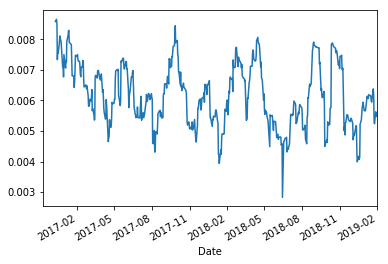

In [15]:
df_close['Volatility'].plot()

# 2-Price analysis

In [16]:
#offset expected change 1-day
df_close['exp_chng'] = df_close['Volatility'] * df_close['Close'].shift()
df_close['actual_chng'] = df_close['Close'] - df_close['Close'].shift()

In [17]:
df_close.head()

,Close,MA_9,MA_21,change,Volatility,exp_chng,actual_chng
Date,,,,,,,
2016-11-08,121.639999,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-09,121.559998,NaN,NaN,-0.000658,NaN,NaN,-0.080002
2016-11-10,119.750000,NaN,NaN,-0.015002,NaN,NaN,-1.809998
2016-11-11,117.099998,NaN,NaN,-0.022378,NaN,NaN,-2.650002
2016-11-14,116.110001,NaN,NaN,-0.008490,NaN,NaN,-0.989998


In [18]:
#running more than once will 
df_close = pd.DataFrame(df_close.iloc[22:])

In [19]:
df_close['Magnitude'] = df_close['actual_chng'] / df_close['exp_chng'] 

In [20]:
df_close.head()

,Close,MA_9,MA_21,change,Volatility,exp_chng,actual_chng,Magnitude
Date,,,,,,,,
2016-12-09,110.400002,112.096667,114.020000,-0.010542,0.008582,0.957515,-1.169998,-1.221911
2016-12-12,110.820000,111.718889,113.594762,0.003797,0.008654,0.955386,0.419998,0.439611
2016-12-13,110.449997,111.446667,113.278095,-0.003344,0.008493,0.941230,-0.370003,-0.393105
2016-12-14,108.830002,111.302222,112.931429,-0.014776,0.007336,0.810275,-1.619995,-1.999314
2016-12-15,107.339996,111.001111,112.465714,-0.013786,0.007700,0.837969,-1.490005,-1.778116


In [21]:
df_close['abs_magni'] = np.abs(df_close['Magnitude'])
df_close.head()

,Close,MA_9,MA_21,change,Volatility,exp_chng,actual_chng,Magnitude,abs_magni
Date,,,,,,,,,
2016-12-09,110.400002,112.096667,114.020000,-0.010542,0.008582,0.957515,-1.169998,-1.221911,1.221911
2016-12-12,110.820000,111.718889,113.594762,0.003797,0.008654,0.955386,0.419998,0.439611,0.439611
2016-12-13,110.449997,111.446667,113.278095,-0.003344,0.008493,0.941230,-0.370003,-0.393105,0.393105
2016-12-14,108.830002,111.302222,112.931429,-0.014776,0.007336,0.810275,-1.619995,-1.999314,1.999314
2016-12-15,107.339996,111.001111,112.465714,-0.013786,0.007700,0.837969,-1.490005,-1.778116,1.778116


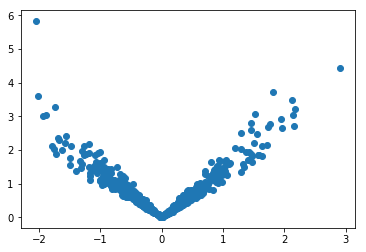

In [22]:
plt.scatter(df_close['actual_chng'], df_close['abs_magni'])